### The propose are: prepare EDA and recomendation system

## Importing the necessary libraries 

In [70]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Link for dataset https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations/data?select=transactions_train.csv

In [68]:
articles=pd.read_csv('./H&M/articles.csv')
customers=pd.read_csv('./H&M/customers.csv')
transactions=pd.read_csv('./H&M/transactions_train.csv')

 Load H&M Dataset

## First, let's analyze the articles

In [3]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


Сheck the number of uniquenesses in the dataset

In [4]:
for col in articles.columns:
    if not 'no' in col and not 'code' in col and not 'id' in col:
        un_n=articles[col].nunique()
        print(f'no of unique{col}:{un_n}')

no of uniqueprod_name:45875
no of uniqueproduct_type_name:131
no of uniqueproduct_group_name:19
no of uniquegraphical_appearance_name:30
no of uniquecolour_group_name:50
no of uniqueperceived_colour_value_name:8
no of uniqueperceived_colour_master_name:20
no of uniquedepartment_name:250
no of uniqueindex_name:10
no of uniqueindex_group_name:5
no of uniquesection_name:56
no of uniquegarment_group_name:21
no of uniquedetail_desc:43404


Checking what are the columns here:

In [69]:
articles.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [67]:
articles.groupby('index_name')['index_name'].count()

index_name
Baby Sizes 50-98                   8875
Children Accessories, Swimwear     4615
Children Sizes 134-170             9214
Children Sizes 92-140             12007
Divided                           15149
Ladies Accessories                 6961
Ladieswear                        26001
Lingeries/Tights                   6775
Menswear                          12553
Sport                              3392
Name: index_name, dtype: int64

Product category analysis

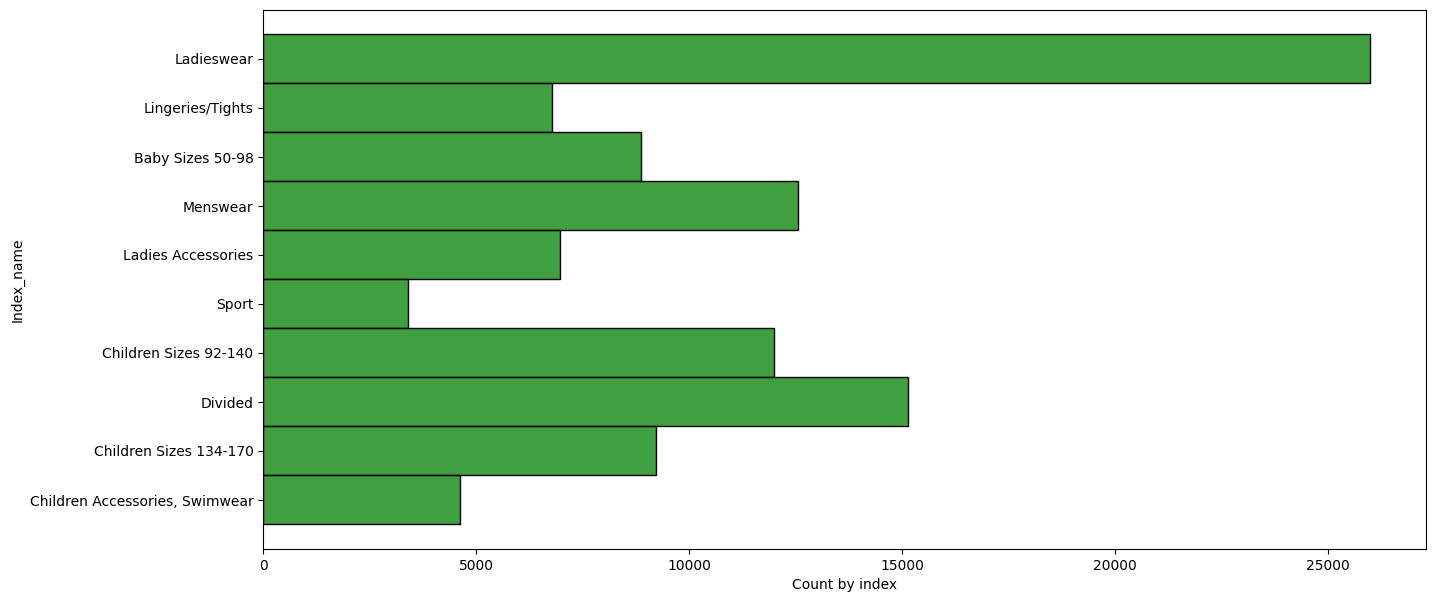

In [7]:
f, ax = plt.subplots(figsize=(15,7))
ax=sns.histplot(data=articles, y='index_name', color='green')
ax.set_xlabel('Count by index')
ax.set_ylabel('Index_name')
plt.show()

Analysis categories depending on the group

In [8]:
articles[['index_group_name','garment_group_name']].head()

,index_group_name,garment_group_name
0,Ladieswear,Jersey Basic
1,Ladieswear,Jersey Basic
2,Ladieswear,Jersey Basic
3,Ladieswear,"Under-, Nightwear"
4,Ladieswear,"Under-, Nightwear"


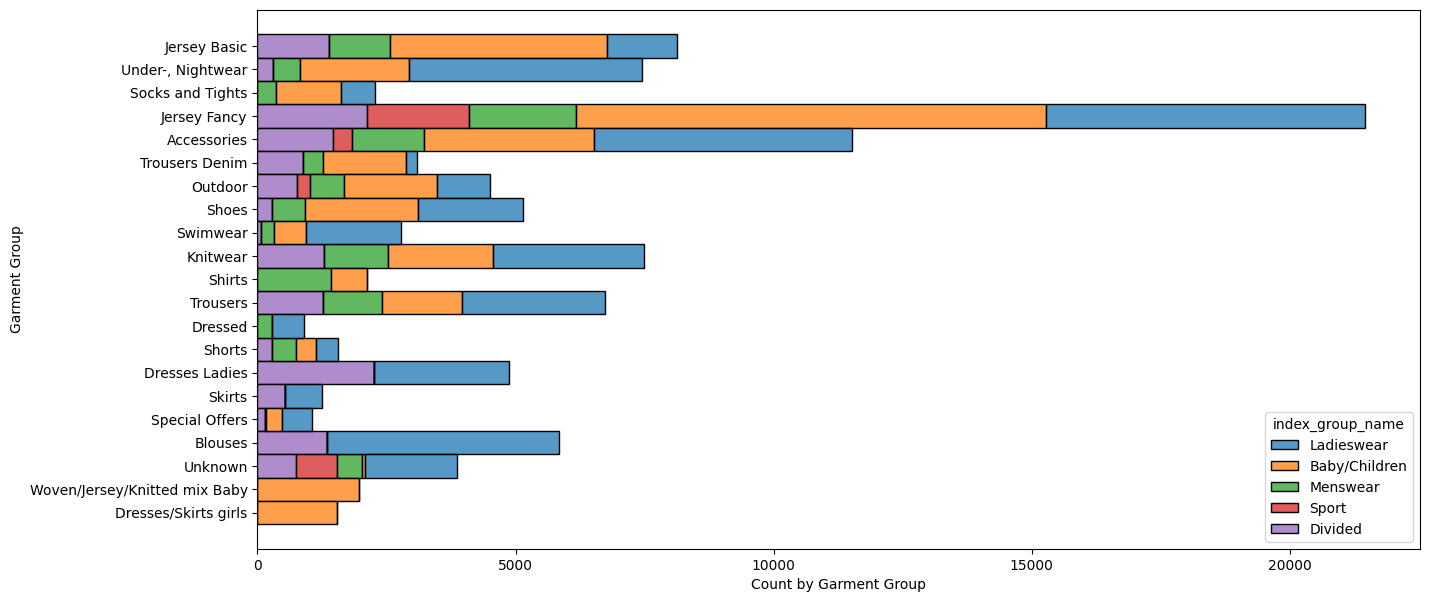

In [9]:
f, ax = plt.subplots(figsize=(15,7))
ax=sns.histplot(data=articles, y='garment_group_name', color='green', hue='index_group_name', multiple='stack')
ax.set_xlabel('Count by Garment Group')
ax.set_ylabel('Garment Group')
plt.show()

Jarsey fancy is the most popular, specialized for women and children (regular basic clothing).

Accessories are the second most popular group because the price 

In [10]:
articles.groupby(['index_group_name','index_name']).count()['article_id']

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
Name: article_id, dtype: int64

Analized different type of goods in each categery goods

In [11]:
pd.options.display.max_rows=None
articles.groupby(['product_group_name', 'product_type_name']).count()['article_id']

product_group_name     product_type_name       
Accessories            Accessories set                 7
                       Alice band                      6
                       Baby Bib                        3
                       Bag                          1280
                       Beanie                         56
                       Belt                          458
                       Bracelet                      180
                       Braces                          3
                       Bucket hat                      7
                       Cap                            13
                       Cap/peaked                    573
                       Dog Wear                       20
                       Earring                      1159
                       Earrings                       11
                       Eyeglasses                      2
                       Felt hat                       10
                       Giftbox          

What type of product is most popular?

In [12]:
top_items= articles.groupby(['product_type_name']).count()['article_id'].sort_values(ascending=False).head(10)
top_items

product_type_name
Trousers    11169
Dress       10362
Sweater      9302
T-shirt      7904
Top          4155
Blouse       3979
Jacket       3940
Shorts       3939
Shirt        3405
Vest top     2991
Name: article_id, dtype: int64

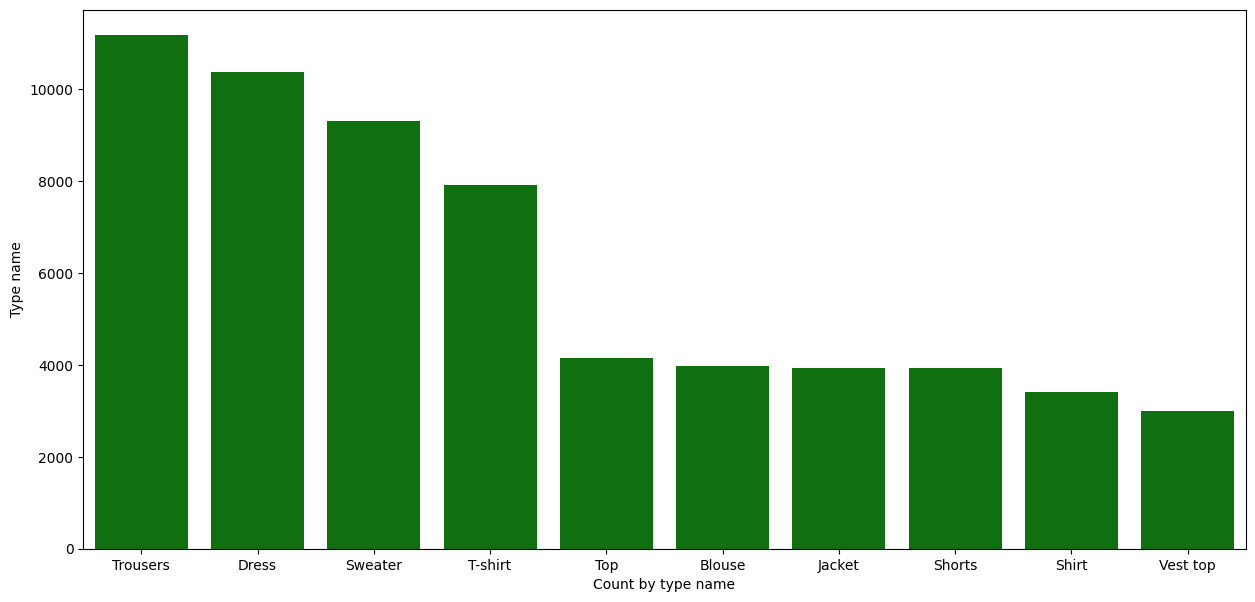

In [13]:
f, ax =plt.subplots(figsize=(15,7))
ax=sns.barplot(x=top_items.index, y=top_items.values, color='green')
ax.set_xlabel('Count by type name')
ax.set_ylabel('Type name')
plt.show()

Which product category has the most items?

In [14]:
top_group= articles.groupby(['product_group_name']).count()['article_id'].sort_values(ascending=False).head(10)
top_group

product_group_name
Garment Upper body    42741
Garment Lower body    19812
Garment Full body     13292
Accessories           11158
Underwear              5490
Shoes                  5283
Swimwear               3127
Socks & Tights         2442
Nightwear              1899
Unknown                 121
Name: article_id, dtype: int64

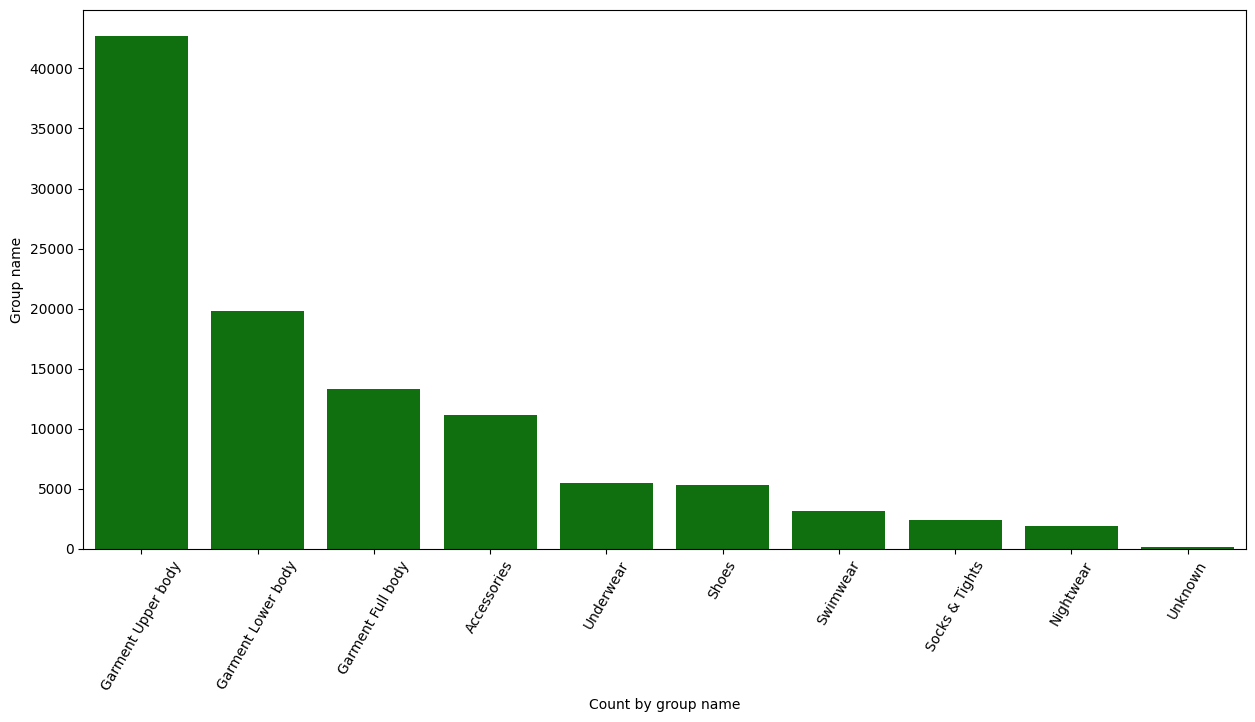

In [15]:
f, ax =plt.subplots(figsize=(15,7))
ax=sns.barplot(x=top_group.index, y=top_group.values, color='green')
ax.set_xlabel('Count by group name')
ax.set_ylabel('Group name')
plt.xticks(np.arange(len(top_group.index)),top_group.index, rotation=60)
plt.show()

Which print is more popular?

In [16]:
top_graph = articles.groupby(['graphical_appearance_name']).count()['article_id'].sort_values(ascending=False).head(10)
top_graph

graphical_appearance_name
Solid               49747
All over pattern    17165
Melange              5938
Stripe               4990
Denim                4842
Front print          3215
Placement print      3098
Check                2178
Colour blocking      1830
Lace                 1513
Name: article_id, dtype: int64

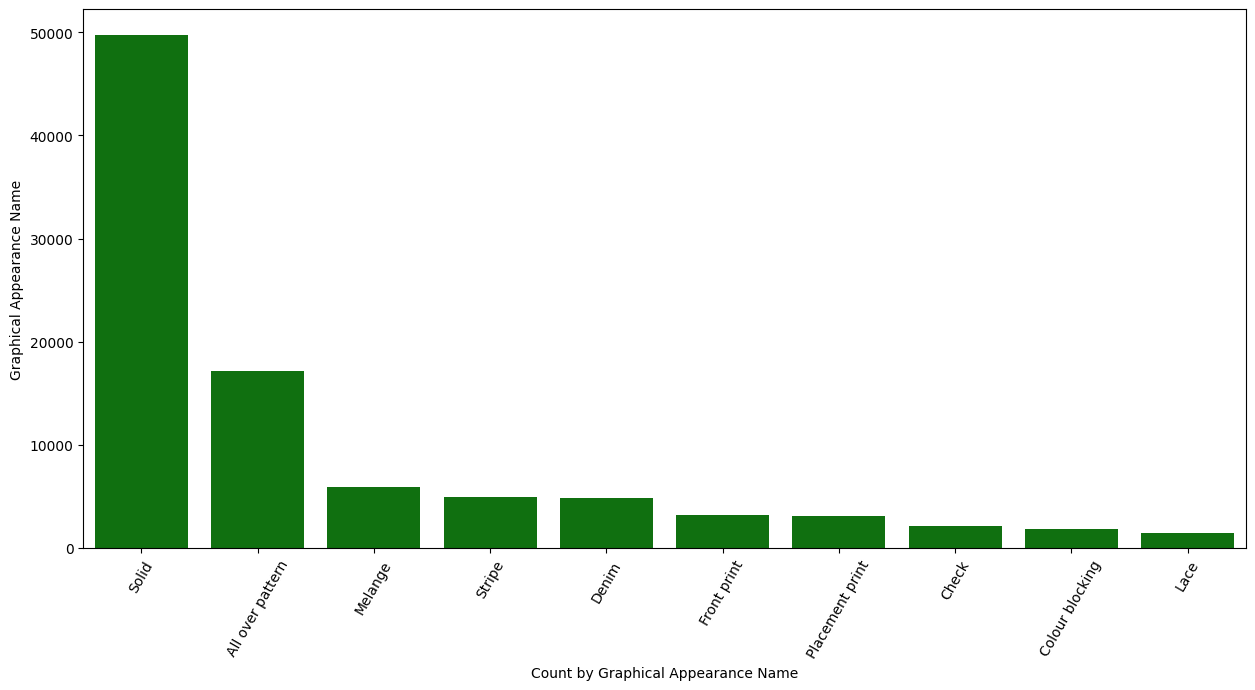

In [17]:
f, ax=plt.subplots(figsize=(15,7))
ax=sns.barplot(x=top_graph.index, y=top_graph.values, color='green')
ax.set_xlabel('Count by Graphical Appearance Name')
ax.set_ylabel('Graphical Appearance Name')
plt.xticks(np.arange(len(top_graph.index)),top_graph.index, rotation=60)
plt.show()

Which collor is more popular?

In [18]:
top_color = articles.groupby(['colour_group_name']).count()['article_id'].sort_values(ascending=False).head(10)
top_color

colour_group_name
Black             22670
Dark Blue         12171
White              9542
Light Pink         5811
Grey               4487
Light Beige        3356
Blue               3308
Red                3056
Light Blue         3012
Greenish Khaki     2767
Name: article_id, dtype: int64

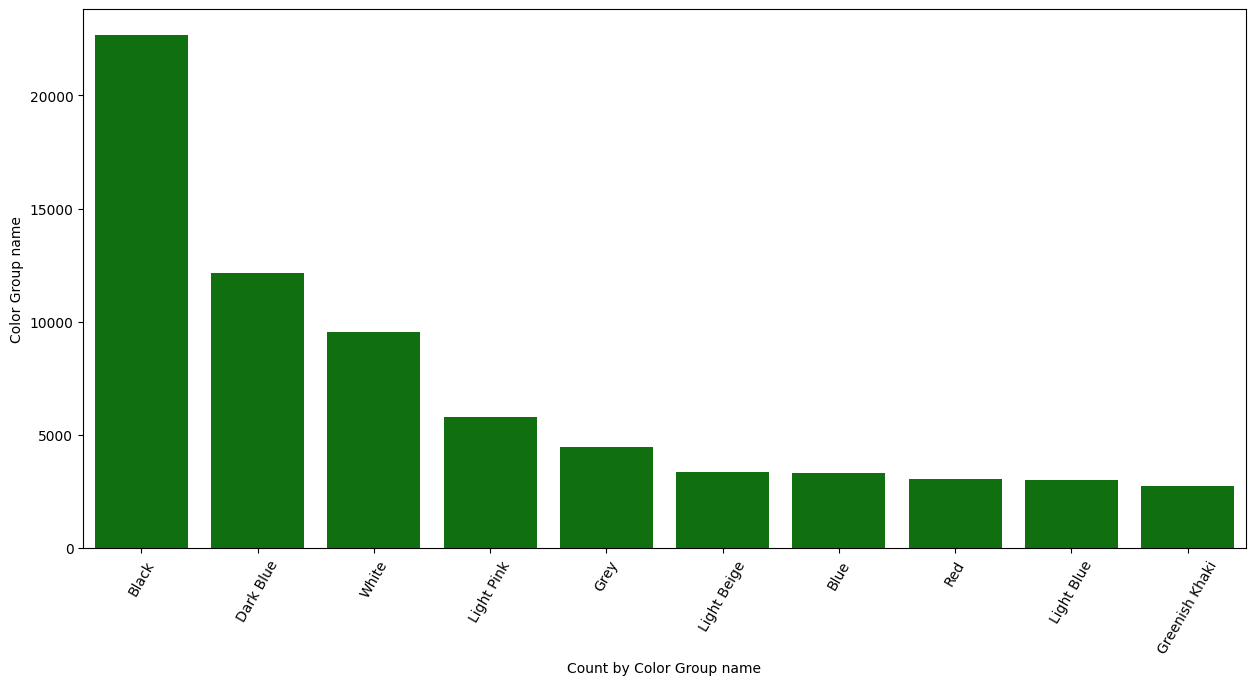

In [19]:
f, ax=plt.subplots(figsize=(15,7))
ax=sns.barplot(x=top_color.index, y=top_color.values, color='green')
ax.set_xlabel('Count by Color Group name')
ax.set_ylabel('Color Group name')
plt.xticks(np.arange(len(top_color.index)),top_color.index, rotation=60)
plt.show()

## Make analysis of customer

In [20]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


Check if duplicates exsist

In [21]:
customers.shape[0]-customers['customer_id'].nunique()

0

0 means that it does not have any dublicates

In [22]:
data_postal=customers.groupby('postal_code', as_index=False).count().sort_values('customer_id', ascending=False)
data_postal.head()

,postal_code,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
61034,2c29ae653a9282cce4151bd87643c907644e09541abc28...,120303,42874,39886,118281,114377,118002
281937,cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac...,261,109,104,261,261,260
156090,714976379549eb90aae4a71bca6c7402cc646ae7c40f6c...,159,90,88,159,159,158
171208,7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5...,157,55,54,157,156,156
126228,5b7eb31eabebd3277de632b82267286d847fd5d44287ee...,156,42,41,156,156,155


In [23]:
customers[customers['postal_code'] == '2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c'].head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
5,000064249685c11552da43ef22a5030f35a147f723d5b0...,NaN,NaN,NaN,NaN,NaN,2c29ae653a9282cce4151bd87643c907644e09541abc28...
8,00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
9,00008469a21b50b3d147c97135e25b4201a8c58997f787...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
11,000097d91384a0c14893c09ed047a963c4fc6a5c021044...,NaN,NaN,ACTIVE,NONE,31.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
14,0000ae1bbb25e04bdc7e35f718e852adfb3fbb72ef38b3...,1.0,1.0,ACTIVE,Regularly,29.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...


The most popular index has 120303 customer_id, that means that techical postal_code. Also we check its not a bot.

Analysed them by age

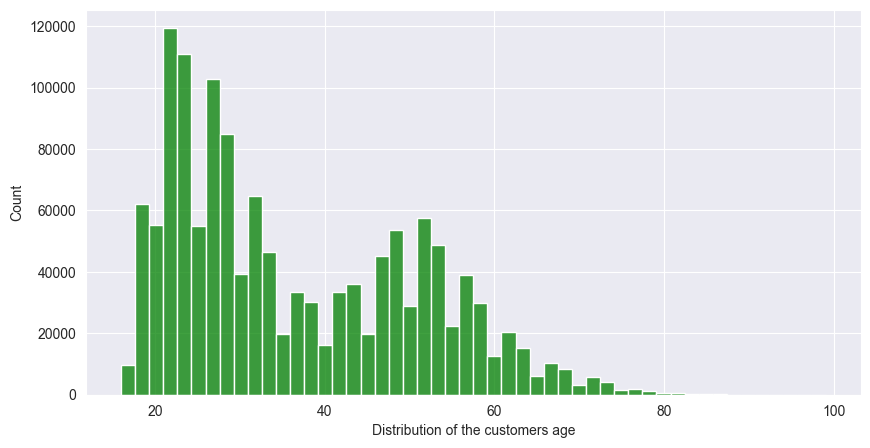

In [24]:
sns.set_style('darkgrid')
f, ax= plt.subplots(figsize=(10,5))
ax=sns.histplot(data=customers, x='age', bins=50, color='green')
ax.set_xlabel('Distribution of the customers age')
plt.show()

Analysis of status of club

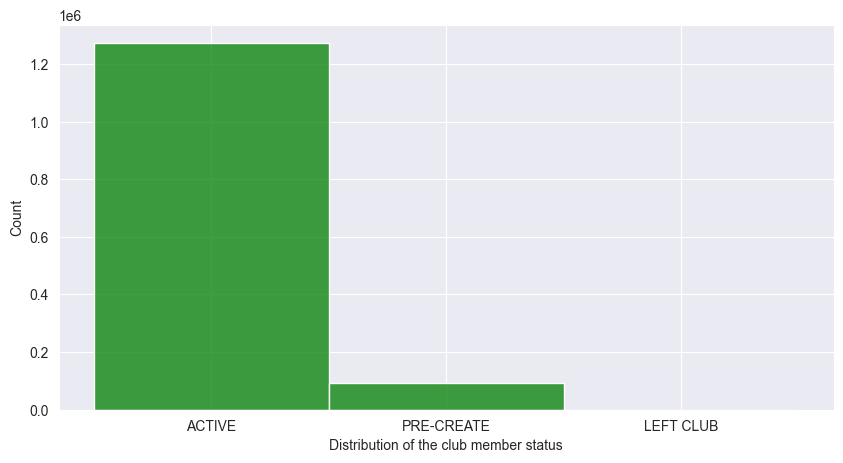

In [25]:
sns.set_style('darkgrid')
f, ax= plt.subplots(figsize=(10,5))
ax=sns.histplot(data=customers, x='club_member_status', bins=50, color='green')
ax.set_xlabel('Distribution of the club member status')
plt.show()

Check how often send news

In [26]:
customers['fashion_news_frequency'].unique()

array(['NONE', 'Regularly', nan, 'Monthly'], dtype=object)

In [27]:
customers.loc[~customers['fashion_news_frequency'].isin(['Regularly', 'Monthly']), 'fashion_news_frequency'] = 'None'
customers['fashion_news_frequency'].unique()

array(['None', 'Regularly', 'Monthly'], dtype=object)

Replace all synonyms with a single word

In [28]:
pie_data=customers[['customer_id','fashion_news_frequency']].groupby('fashion_news_frequency').count()
pie_data

,customer_id
fashion_news_frequency,
Monthly,842
None,893722
Regularly,477416


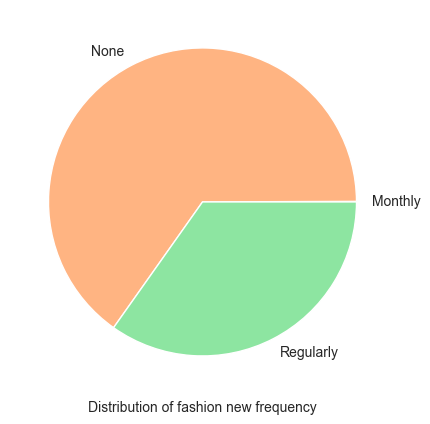

In [29]:
sns.set_style('darkgrid')
f, ax= plt.subplots(figsize=(10,5))
colors=sns.color_palette('pastel')
ax.pie(pie_data.customer_id, labels=pie_data.index, colors=colors)
ax.set_facecolor('green')
ax.set_xlabel('Distribution of fashion new frequency')
plt.show()

People don't like get the news

## Transaction analysis

In [30]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [31]:
pd.set_option('display.float_format', '{:.4f}'.format)
transactions.describe()['price']

count   31788324.0000
mean           0.0278
std            0.0192
min            0.0000
25%            0.0158
50%            0.0254
75%            0.0339
max            0.5915
Name: price, dtype: float64

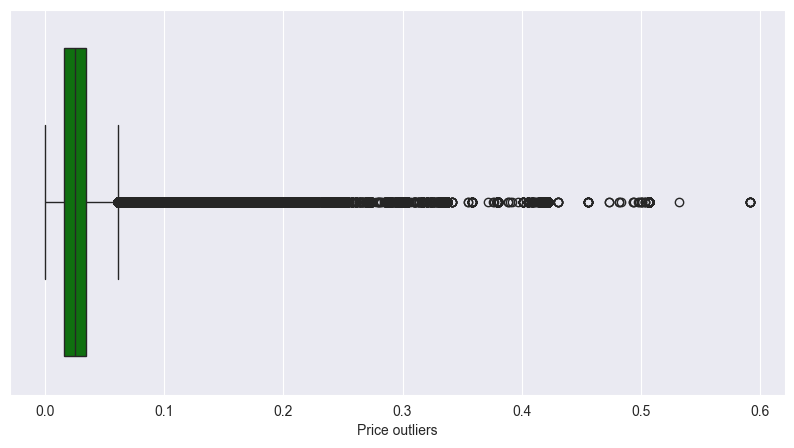

In [32]:
sns.set_style('darkgrid')
f, ax= plt.subplots(figsize=(10,5))
ax=sns.boxplot(data=transactions, x='price', color='green')
ax.set_xlabel('Price outliers')
plt.show()

In [33]:
transactions_byid=transactions.groupby('customer_id').count()
transactions_byid.sort_values(by='price', ascending=False)['price'].head(10)

customer_id
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    1895
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f    1364
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    1361
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6    1237
55d15396193dfd45836af3a6269a079efea339e875eff42cc0c228b002548a9d    1208
c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27cf9bda5517c8774f8fa    1170
8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d659fa4e5c3af6cc076    1169
03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296    1157
6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2e57161f0ef810a4b55    1143
Name: price, dtype: int64

Analysis price inside in group of goods

In [34]:
articles_for_merge= articles[['article_id','prod_name', 'product_type_name','product_group_name','index_name']]
articles_for_merge.head()

,article_id,prod_name,product_type_name,product_group_name,index_name
0,108775015,Strap top,Vest top,Garment Upper body,Ladieswear
1,108775044,Strap top,Vest top,Garment Upper body,Ladieswear
2,108775051,Strap top (1),Vest top,Garment Upper body,Ladieswear
3,110065001,OP T-shirt (Idro),Bra,Underwear,Lingeries/Tights
4,110065002,OP T-shirt (Idro),Bra,Underwear,Lingeries/Tights


In [35]:
articles_for_merge=transactions[['customer_id','article_id','price','t_dat']].merge(articles_for_merge, on='article_id', how='left')
articles_for_merge.head()

,customer_id,article_id,price,t_dat,prod_name,product_type_name,product_group_name,index_name
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.0508,2018-09-20,Atlanta Push Body Harlow,Underwear body,Underwear,Lingeries/Tights
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.0305,2018-09-20,Rae Push (Melbourne) 2p,Bra,Underwear,Lingeries/Tights
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.0152,2018-09-20,Inca Jumper,Sweater,Garment Upper body,Divided
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.0169,2018-09-20,W YODA KNIT OL OFFER,Sweater,Garment Upper body,Ladieswear
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.0169,2018-09-20,W YODA KNIT OL OFFER,Sweater,Garment Upper body,Ladieswear


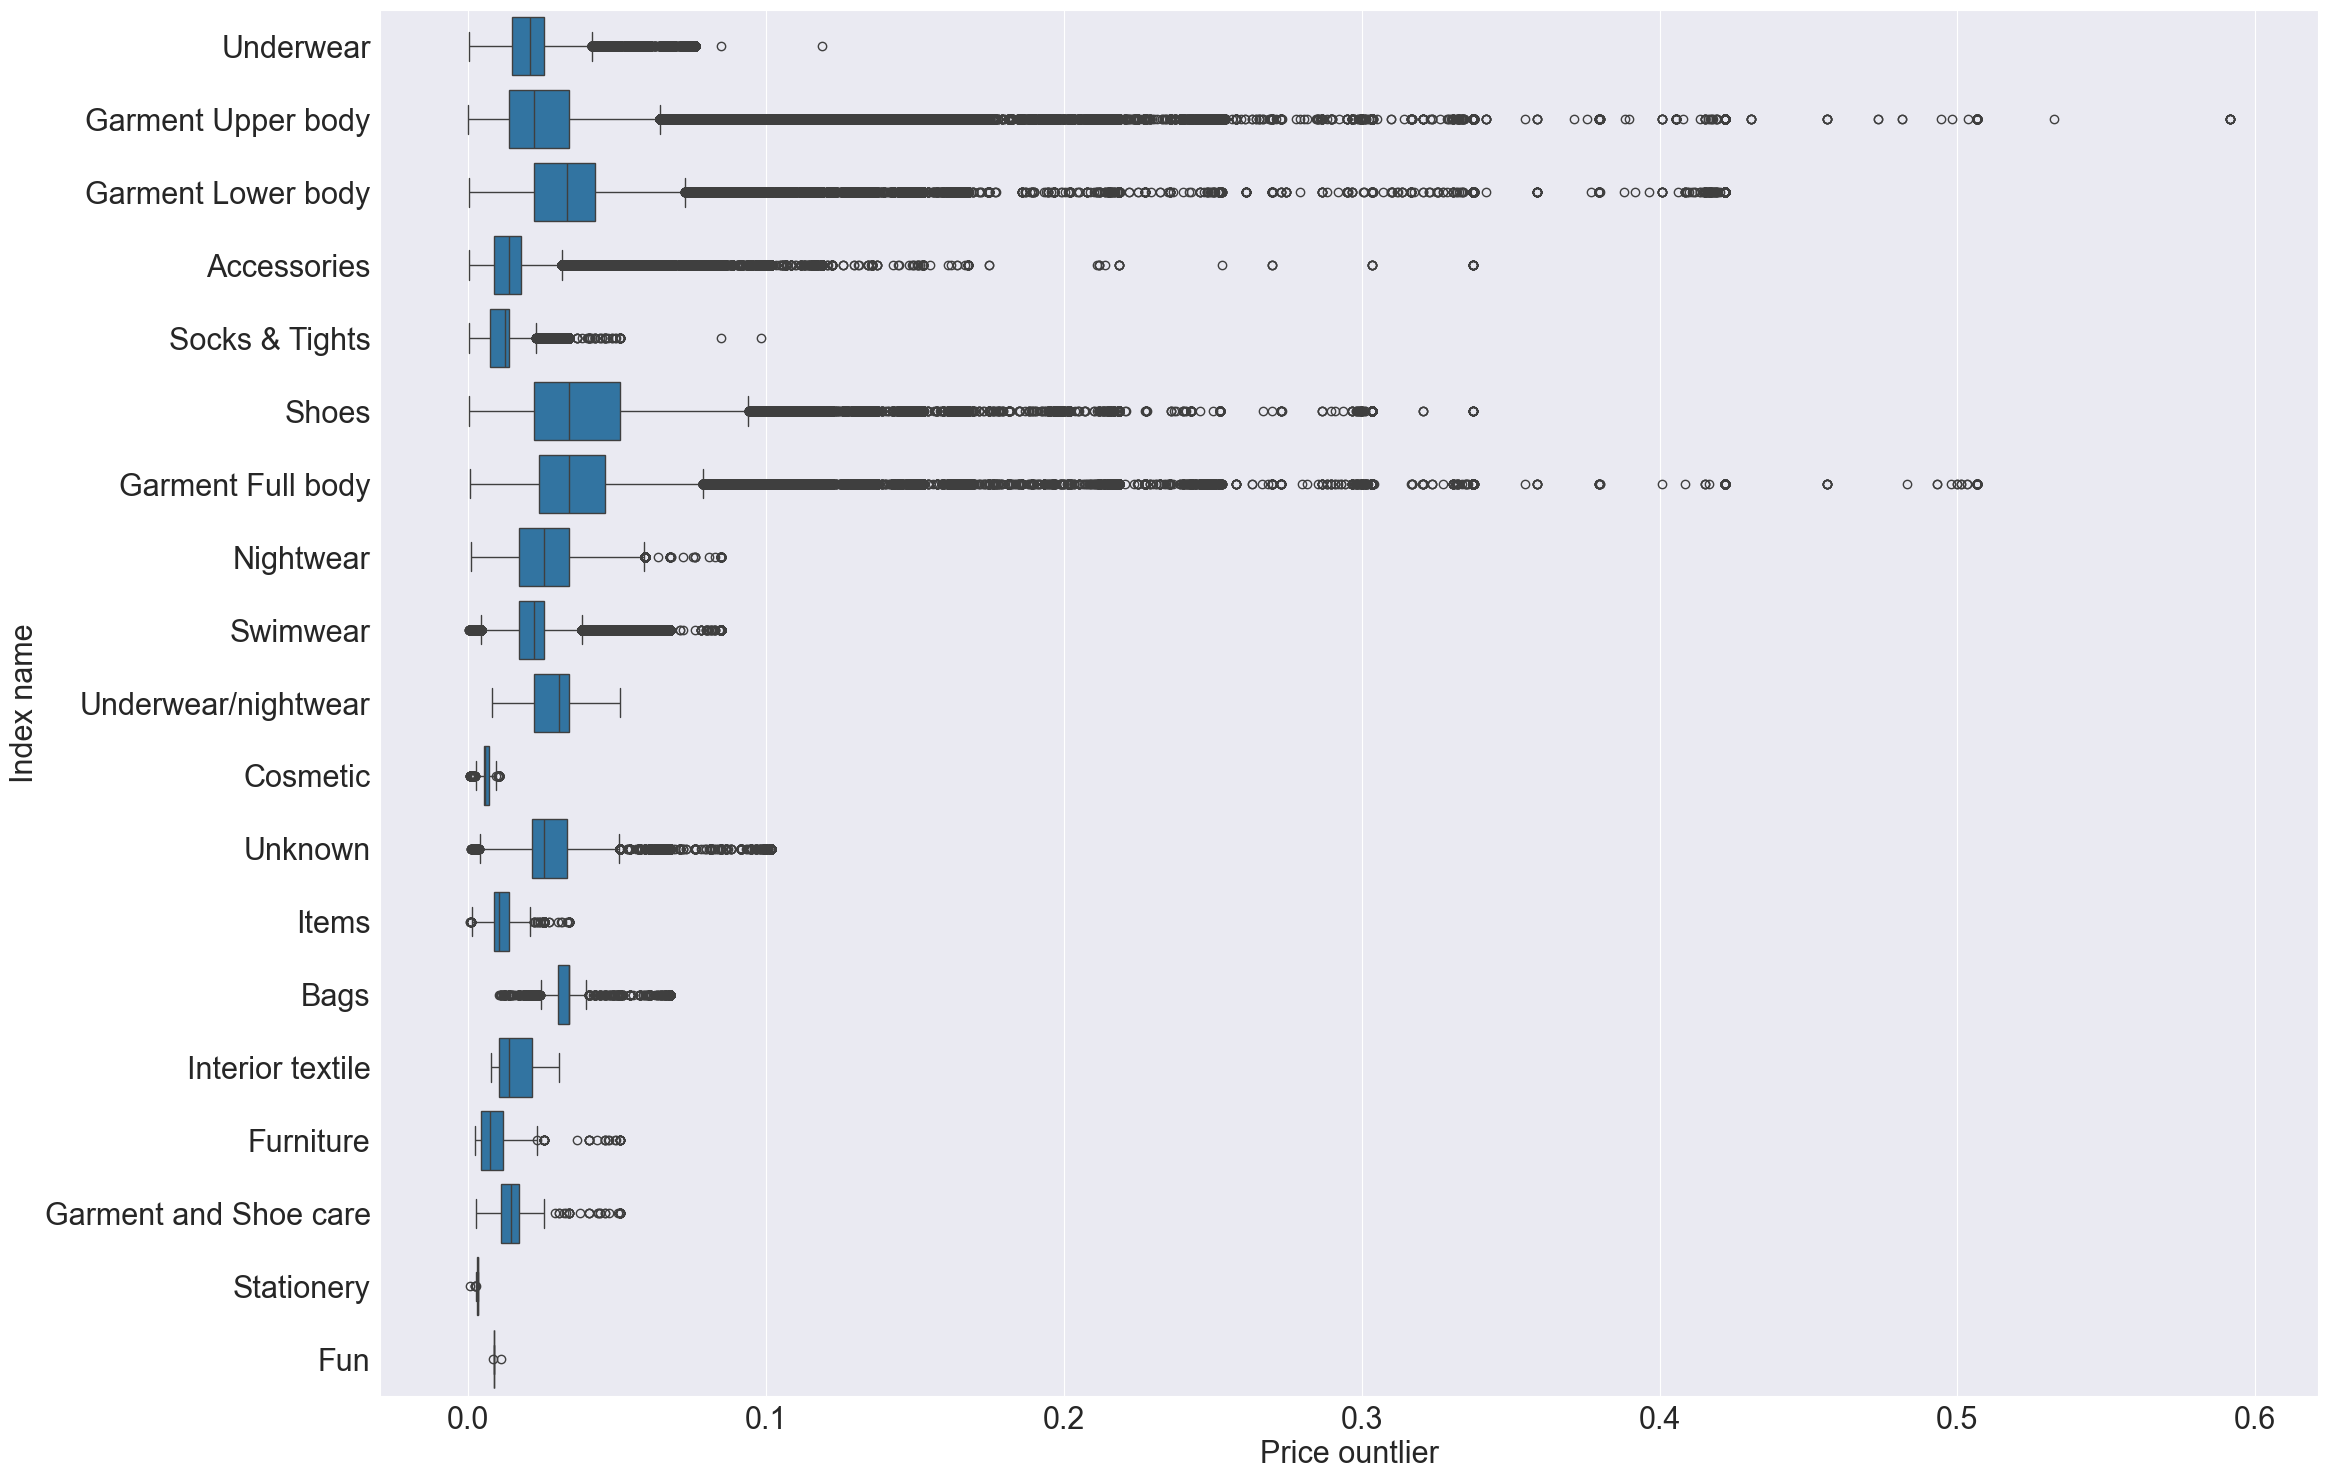

In [36]:
sns.set_style('darkgrid')
f, ax= plt.subplots(figsize=(25,18))
ax= sns.boxplot(data=articles_for_merge, x='price', y='product_group_name')
ax.set_xlabel('Price ountlier', fontsize=22)
ax.set_ylabel('Index name', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)
plt.show()

Here we look outliers in cost price in each group

In [37]:
accessoriex=articles_for_merge[articles_for_merge['product_group_name']=='Accessories']
accessoriex.head()

,customer_id,article_id,price,t_dat,prod_name,product_type_name,product_group_name,index_name
38,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,553139001,0.0339,2018-09-20,Jenner waist belt,Belt,Accessories,Ladies Accessories
39,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,553139001,0.0339,2018-09-20,Jenner waist belt,Belt,Accessories,Ladies Accessories
54,002b3c0a44a22c45a8d62ea9d2b88d1a89e335f8b84003...,673531001,0.0085,2018-09-20,Keyring fluff,Other accessories,Accessories,"Children Accessories, Swimwear"
62,00401a367c5ac085cb9d4b77c56f3edcabf25153615db9...,633675001,0.0102,2018-09-20,A-band unicorn PU,Hair/alice band,Accessories,"Children Accessories, Swimwear"
82,005c9fb2ba6c49b2098a662f64a9124ef95cbec5fcf4eb...,560783010,0.0051,2018-09-20,Polly pencil case,Bag,Accessories,Divided


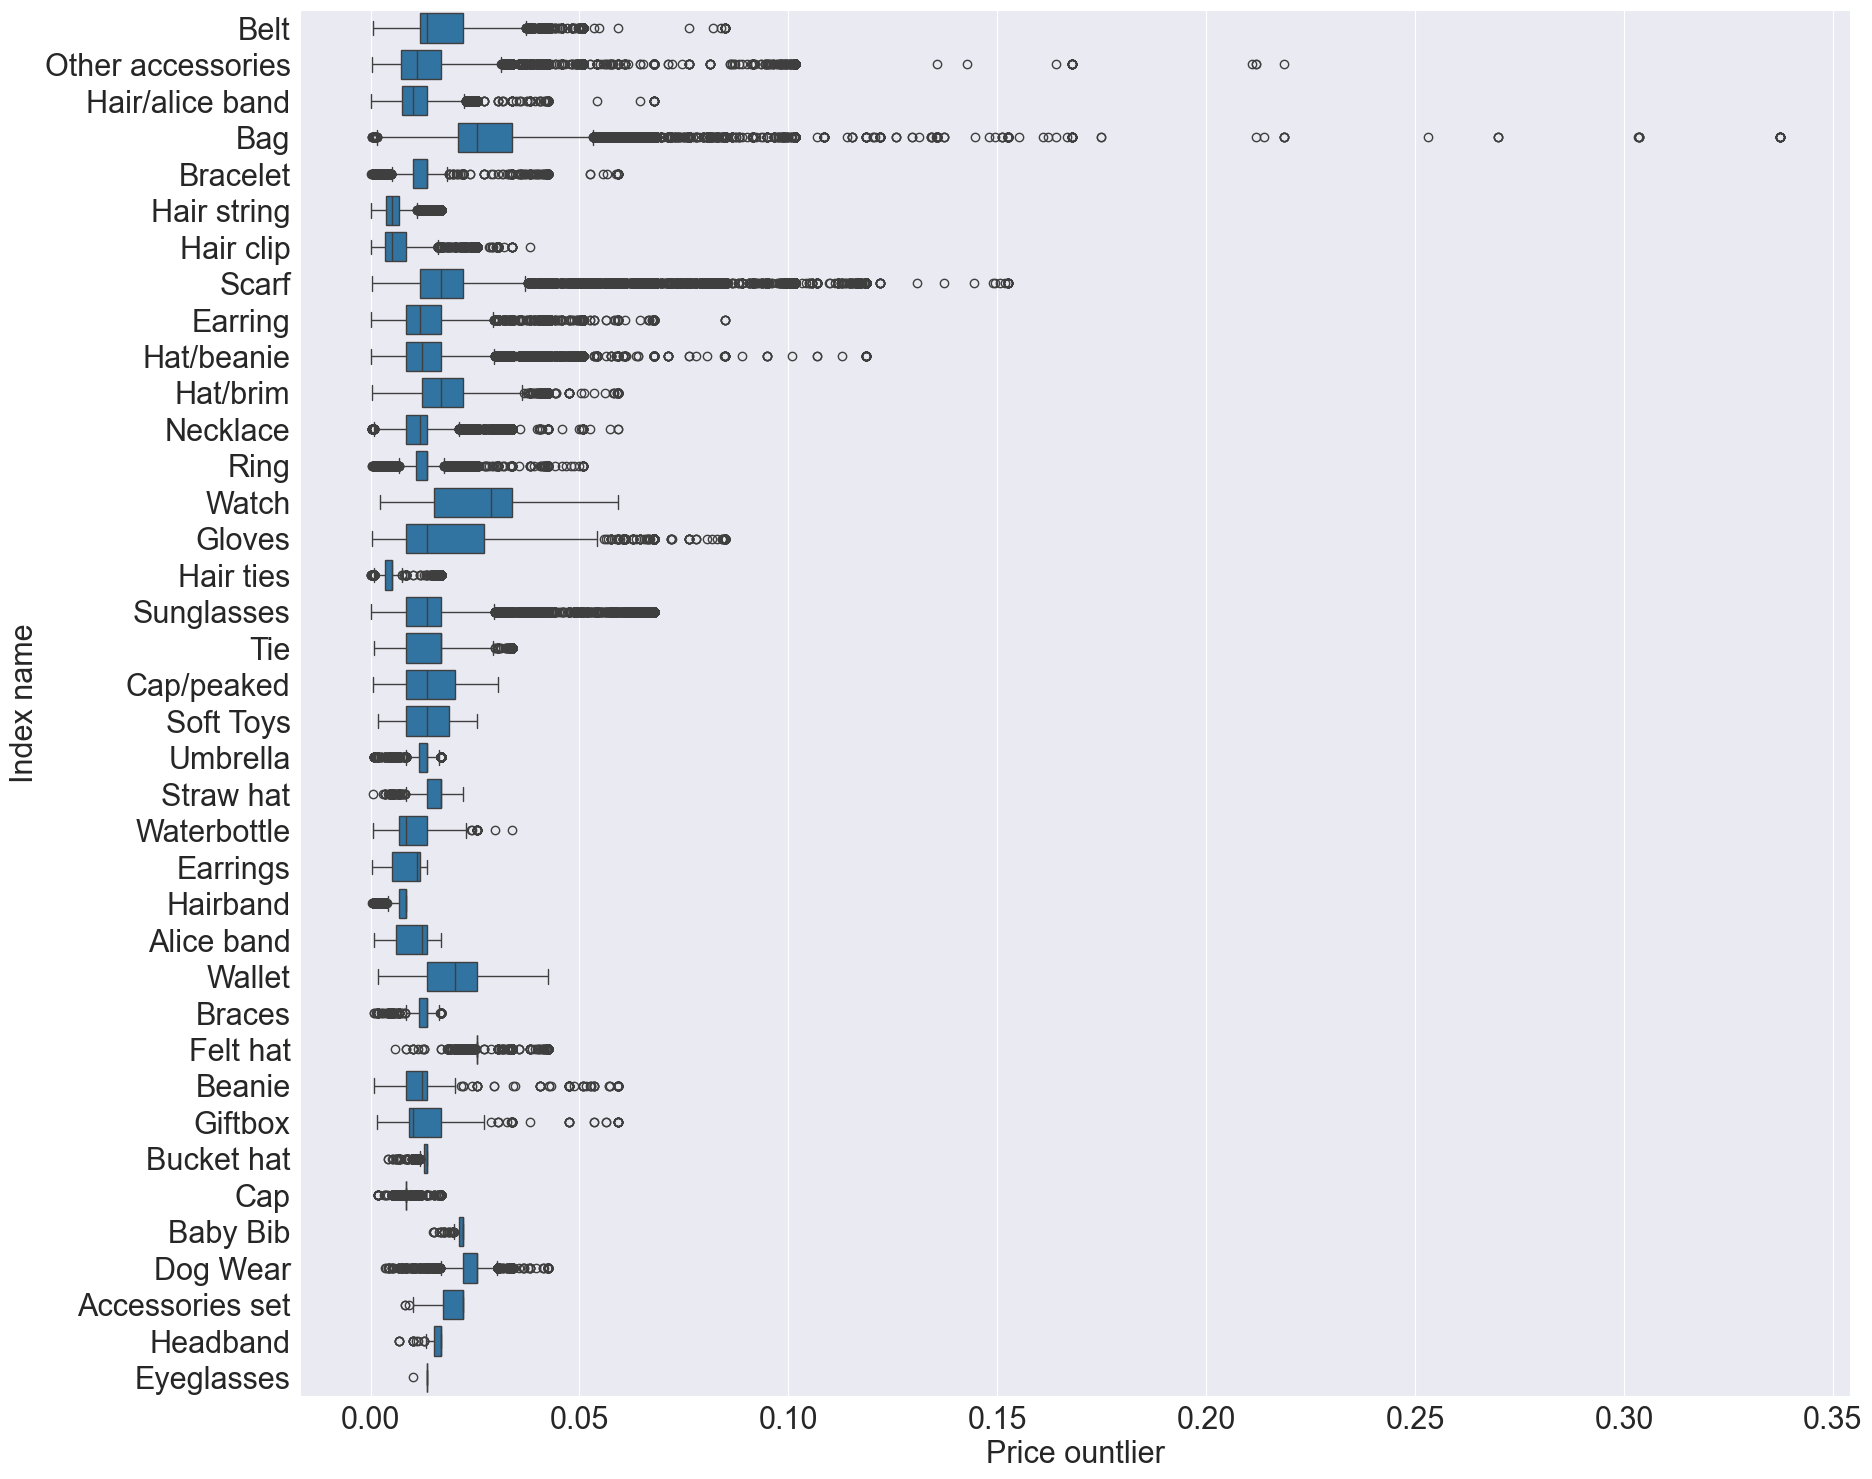

In [38]:
sns.set_style('darkgrid')
f, ax= plt.subplots(figsize=(20,18))
ax= sns.boxplot(data=accessoriex, x='price', y='product_type_name')
ax.set_xlabel('Price ountlier', fontsize=22)
ax.set_ylabel('Index name', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)
plt.show()

The most expensive bag and scharf

In [39]:
articles_index=articles_for_merge[['index_name','price']].groupby('index_name').mean()
articles_index= articles_index.sort_values('price', ascending=False)
articles_index

,price
index_name,
Ladieswear,0.0328
Sport,0.0288
Menswear,0.0275
Divided,0.0265
Ladies Accessories,0.0240
Children Sizes 134-170,0.0219
Lingeries/Tights,0.0208
"Children Accessories, Swimwear",0.0176
Children Sizes 92-140,0.0175


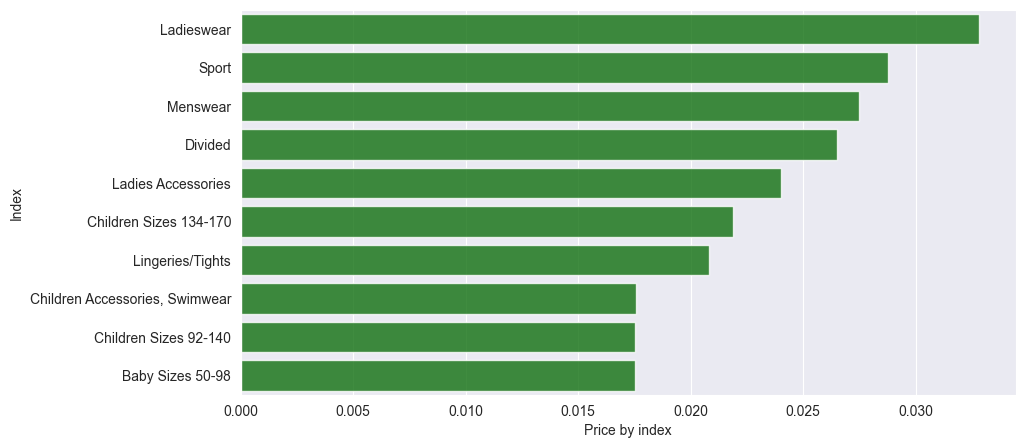

In [40]:
sns.set_style('darkgrid')
f, ax= plt.subplots(figsize=(10,5))
ax=sns.barplot(x=articles_index.price, y=articles_index.index, color='green', alpha=0.8)
ax.set_xlabel('Price by index')
ax.set_ylabel('Index')
plt.show()

In [41]:
articles_index1=articles_for_merge[['product_group_name','price']].groupby('product_group_name').mean()
articles_index1= articles_index1.sort_values('price', ascending=False)
articles_index1

,price
product_group_name,
Shoes,0.0387
Garment Full body,0.0362
Bags,0.0333
Garment Lower body,0.0329
Underwear/nightwear,0.0279
Garment Upper body,0.0270
Unknown,0.0268
Nightwear,0.0254
Swimwear,0.0223


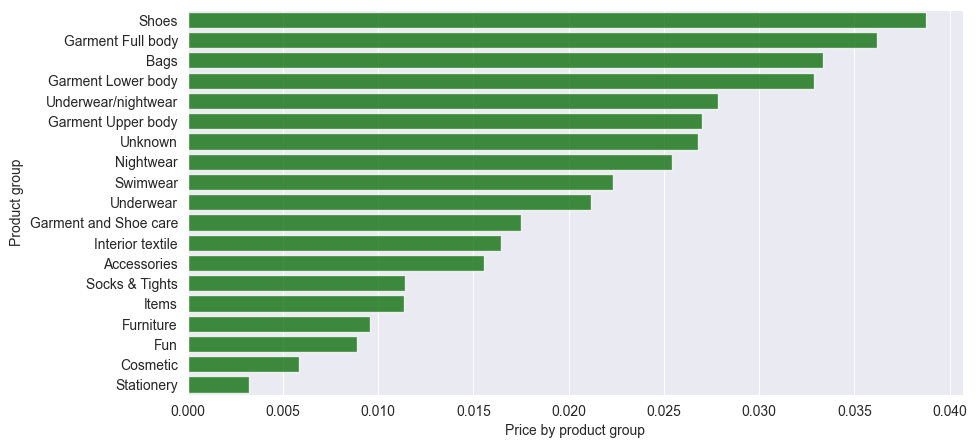

In [42]:
sns.set_style('darkgrid')
f, ax= plt.subplots(figsize=(10,5))
ax=sns.barplot(x=articles_index1.price, y=articles_index1.index, color='green', alpha=0.8)
ax.set_xlabel('Price by product group')
ax.set_ylabel('Product group')
plt.show()

Analysis price in time

In [43]:
articles_for_merge['t_dat']=pd.to_datetime(articles_for_merge['t_dat'])

In [44]:
articles_for_merge_product=articles_for_merge[articles_for_merge.product_group_name == 'Shoes']
series_mean=articles_for_merge_product[['t_dat','price']].groupby(pd.Grouper(key='t_dat', freq='M')).mean()
series_mean

/var/folders/_p/4dfpqkxd0991lhs_yc9r02dm0000gn/T/ipykernel_67552/4166968911.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  series_mean=articles_for_merge_product[['t_dat','price']].groupby(pd.Grouper(key='t_dat', freq='M')).mean()


,price
t_dat,
2018-09-30,0.0434
2018-10-31,0.0417
2018-11-30,0.0455
2018-12-31,0.0442
2019-01-31,0.0438
2019-02-28,0.0405
2019-03-31,0.0402
2019-04-30,0.0375
2019-05-31,0.0366


In [45]:
series_std = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key='t_dat', freq='ME')).std().fillna(0)
series_std

,price
t_dat,
2018-09-30,0.0277
2018-10-31,0.0268
2018-11-30,0.0265
2018-12-31,0.0277
2019-01-31,0.0271
2019-02-28,0.0232
2019-03-31,0.0201
2019-04-30,0.0199
2019-05-31,0.0202


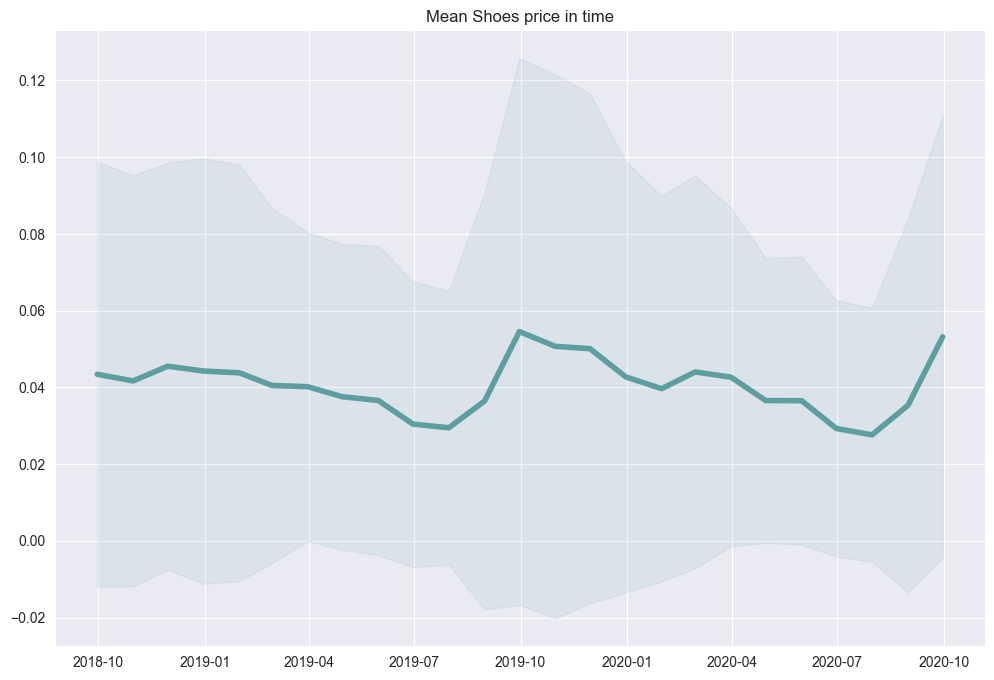

In [46]:
f, ax=plt.subplots(1,1, figsize=(12,8))
ax.plot(series_mean, linewidth=4, color='cadetblue')
ax.fill_between(series_mean.index,
                (series_mean.values-2*series_std.values).ravel(),
                (series_mean.values+2*series_std.values).ravel(),
                color='cadetblue', alpha=.1)

ax.set_title(f'Mean Shoes price in time')
plt.show()

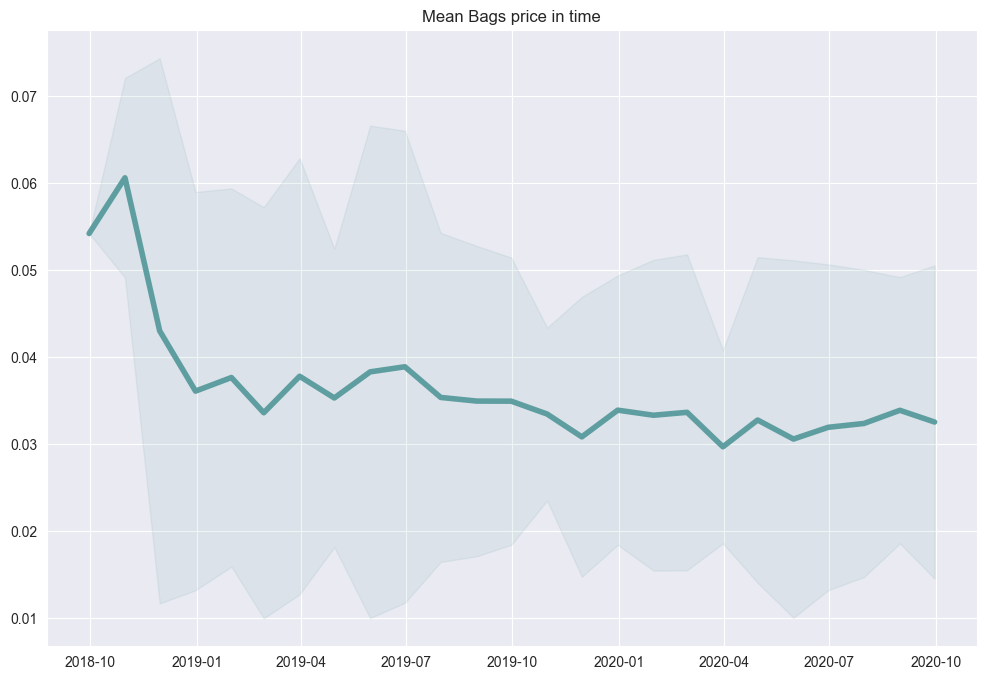

In [47]:
articles_for_merge_product1=articles_for_merge[articles_for_merge.product_group_name == 'Bags']
series_mean1=articles_for_merge_product1[['t_dat','price']].groupby(pd.Grouper(key='t_dat', freq='ME')).mean()
series_std1= articles_for_merge_product1[['t_dat','price']].groupby(pd.Grouper(key='t_dat', freq='ME')).std().fillna(0)

f, ax=plt.subplots(1,1, figsize=(12,8))
ax.plot(series_mean1, linewidth=4, color='cadetblue')
ax.fill_between(series_mean1.index,
                (series_mean1.values-2*series_std1.values).ravel(),
                (series_mean1.values+2*series_std1.values).ravel(),
                color='cadetblue', alpha=.1)

ax.set_title(f'Mean Bags price in time')
plt.show()

## Collaborative filtering


In [48]:
transactions['customer_id_cat']=transactions.customer_id.astype('category')

In [49]:
%%time
transactions.customer_id_cat.unique()

CPU times: user 103 ms, sys: 7.07 ms, total: 110 ms
Wall time: 108 ms


['000058a12d5b43e67d225668fa1f8d618c13dc232df0c..., '00007d2de826758b65a93dd24ce629ed66842531df669..., '00083cda041544b2fbb0e0d2905ad17da7cf1007526fb..., '0008968c0d451dbc5a9968da03196fe20051965edde74..., '000aa7f0dc06cd7174389e76c9e132a67860c5f65f970..., ..., 'fe99a0069d6b3c64c2707d0ce53b9311540917471d82d..., 'fecc5f77b5f7ee4570efde9ab05ec94d0de2bf80efb4f..., 'fece2f68864c311a0b5208e2eb735b3dcde7e41461d32..., 'fee56cc5315dafb35a4490ccc6f711092cae913550c83..., 'ff5b8a8b26bf93a66290e9bd1b73393ac6a58968a7851...]
Length: 1362281
Categories (1362281, object): ['00000dbacae5abe5e23885899a1fa44253a17956c6d1c..., '0000423b00ade91418cceaf3b26c6af3dd342b51fd051..., '000058a12d5b43e67d225668fa1f8d618c13dc232df0c..., '00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd..., ..., 'ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab..., 'ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a..., 'ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe3..., 'ffffd9ac14e89946416d80e791d064701994755c3ab68...]

We are going to take first 1000 people because 1362281 it's too much

In [50]:
customers_id_1k=transactions['customer_id'].unique()[:1000]
customers_dict={id: i for i, id in enumerate(customers_id_1k)}
len(customers_dict)

1000

In [51]:
transactions_small=transactions[transactions['customer_id_cat'].isin(customers_id_1k)].copy()
transactions_small.head()

,t_dat,customer_id,article_id,price,sales_channel_id,customer_id_cat
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.0508,2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.0305,2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.0152,2,00007d2de826758b65a93dd24ce629ed66842531df6699...
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.0169,2,00007d2de826758b65a93dd24ce629ed66842531df6699...
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.0169,2,00007d2de826758b65a93dd24ce629ed66842531df6699...


In [52]:
from tqdm import tqdm
tqdm.pandas()
def replace(x):
    try:
        res=customers_dict[x.customer_id_cat]
    except Exception as e:
        print(e)
        res=-1
    return res
transactions_small['customer_id']=transactions_small.progress_apply(replace, axis=1)
transactions_small.head()

100%|██████████| 72374/72374 [00:00<00:00, 99056.99it/s] 


,t_dat,customer_id,article_id,price,sales_channel_id,customer_id_cat
0,2018-09-20,0,663713001,0.0508,2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...
1,2018-09-20,0,541518023,0.0305,2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...
2,2018-09-20,1,505221004,0.0152,2,00007d2de826758b65a93dd24ce629ed66842531df6699...
3,2018-09-20,1,685687003,0.0169,2,00007d2de826758b65a93dd24ce629ed66842531df6699...
4,2018-09-20,1,685687004,0.0169,2,00007d2de826758b65a93dd24ce629ed66842531df6699...


Transforming customer_id more conveniently for us

Let's see which customer made the most purchases

In [53]:
transactions_small['customer_id'].value_counts()

customer_id
218    1157
990    1059
379     756
566     652
988     572
104     491
755     489
505     477
810     475
528     462
748     448
139     420
357     355
396     339
157     339
238     338
332     337
92      322
222     321
209     319
518     311
709     307
778     300
359     297
119     295
984     290
18      288
867     288
989     286
346     285
281     281
860     281
514     273
547     267
724     266
841     263
116     261
348     252
532     251
189     250
243     247
882     243
132     236
970     236
354     232
220     232
603     232
43      231
730     231
669     230
629     228
783     227
476     225
971     225
859     224
892     221
136     218
487     218
946     211
367     210
696     210
956     209
103     208
850     208
345     208
383     207
477     207
482     206
523     206
681     206
290     205
560     205
351     205
918     202
161     202
507     197
769     195
224     195
44      194
324     192
951     188
236     187
298 

In [54]:
grouped=transactions_small.groupby(['customer_id', 'article_id']).count()['sales_channel_id']
grouped

customer_id  article_id
0            351484002      2
             541518023      1
             578020002      1
             663713001      2
             723529001      1
             727808001      1
             727808007      1
             750424014      2
             794321007      1
             851400006      1
             852643001      1
             852643003      1
             858883002      1
             870304002      2
1            160442007      1
             160442010      1
             272591001      1
             304786008      1
             312878001      1
             312878010      2
             349301001      1
             349301041      1
             351933001      1
             372860001      1
             413707001      1
             425217006      1
             444325004      1
             464454004      1
             478549001      1
             505221001      1
             505221004      1
             508184022      1
             515

In [71]:
customer_item_matrix=grouped.unstack('article_id')

Make flag do people buy this thing or not


In [56]:
customer_item_matrix = customer_item_matrix.apply(lambda x: x.map(lambda y: 1 if y > 1 else 0))
customer_item_matrix.head()

article_id,108775015,108775044,108775051,110065001,110065011,111565001,111586001,111593001,111609001,116379047,...,941005001,942064001,942187001,944506001,946282001,946748003,946748004,947060001,947509001,949198001
customer_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Based on our data, we will perform cosine similarity (measures the similarity between two vectors of the inner product of space) of our matrix to get a matrix with data on who bought what items

In [57]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim=cosine_similarity(customer_item_matrix, customer_item_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [58]:
cosine_sim_df=pd.DataFrame(cosine_sim)
cosine_sim_df.columns=customer_item_matrix.index
cosine_sim_df['customer_id']=customer_item_matrix.index
cosine_sim_df= cosine_sim_df.set_index('customer_id')
cosine_sim_df.head()

customer_id,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
customer_id,,,,,,,,,,,,,,,,,,,,,
0,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1387,0.0000,0.0000,0.0000
1,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0606,...,0.0141,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


For example we take some buyer, we look that buyer who bought the same


In [59]:
cosine_sim_df.loc[5].sort_values(ascending=False)

customer_id
5     1.0000
344   0.2041
809   0.1459
92    0.0754
665   0.0000
670   0.0000
669   0.0000
668   0.0000
667   0.0000
666   0.0000
0     0.0000
664   0.0000
671   0.0000
662   0.0000
661   0.0000
660   0.0000
663   0.0000
673   0.0000
672   0.0000
674   0.0000
675   0.0000
676   0.0000
677   0.0000
678   0.0000
679   0.0000
680   0.0000
681   0.0000
682   0.0000
683   0.0000
684   0.0000
685   0.0000
659   0.0000
658   0.0000
687   0.0000
642   0.0000
629   0.0000
630   0.0000
631   0.0000
632   0.0000
633   0.0000
634   0.0000
635   0.0000
636   0.0000
637   0.0000
638   0.0000
639   0.0000
640   0.0000
641   0.0000
643   0.0000
657   0.0000
644   0.0000
645   0.0000
646   0.0000
647   0.0000
648   0.0000
649   0.0000
650   0.0000
651   0.0000
652   0.0000
653   0.0000
654   0.0000
655   0.0000
656   0.0000
686   0.0000
689   0.0000
688   0.0000
734   0.0000
721   0.0000
722   0.0000
723   0.0000
724   0.0000
725   0.0000
726   0.0000
727   0.0000
728   0.0000
729   0.0000


We're finding what he bought


In [60]:
a=customer_item_matrix.loc[5]
items_bought_a=a[a>0].index.tolist()
items_bought_a

[469039019, 787946002, 803986005, 803986006]

Now we're looking who with other bougth the same

In [61]:
b=customer_item_matrix.loc[344]
items_bought_b= b[b>0].index.tolist()
items_bought_b

[189616006, 516000001, 547780019, 565379022, 766346003, 787946002]

Get items that the second buyer didn't purchase from the list of goods bought by the first buyer.

In [62]:
items_remomenden_to_a=set(items_bought_b) - set(items_bought_a)
items_remomenden_to_a

{189616006, 516000001, 547780019, 565379022, 766346003}

In [63]:
articles[articles['article_id'].isin(items_remomenden_to_a)][['article_id','prod_name','product_type_name']].drop_duplicates().set_index('article_id')

,prod_name,product_type_name
article_id,,
189616006,Heavy jsy long leg,Leggings/Tights
516000001,Agnes LS R-neck,T-shirt
547780019,Basic sweatpants,Trousers
565379022,Moa tank,Vest top
766346003,Kanta RW Slacks,Leggings/Tights


These goods we can recommed to second buyer.

## Thank you